In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import math

sns.set_theme(color_codes=True)

In [3]:

df=pd.read_csv('ABNB.csv')
df.head()



,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-11,146.550003,151.500000,135.100006,139.250000,139.250000,26980800
1,2020-12-14,135.000000,135.300003,125.160004,130.000000,130.000000,16966100
2,2020-12-15,126.690002,127.599998,121.500000,124.800003,124.800003,10914400
3,2020-12-16,125.830002,142.000000,124.910004,137.990005,137.990005,20409600
4,2020-12-17,143.000000,152.449997,142.669998,147.050003,147.050003,15054700


In [4]:
#convert date coloumn to datetime format
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-11,146.550003,151.500000,135.100006,139.250000,139.250000,26980800
2020-12-14,135.000000,135.300003,125.160004,130.000000,130.000000,16966100
2020-12-15,126.690002,127.599998,121.500000,124.800003,124.800003,10914400
2020-12-16,125.830002,142.000000,124.910004,137.990005,137.990005,20409600
2020-12-17,143.000000,152.449997,142.669998,147.050003,147.050003,15054700


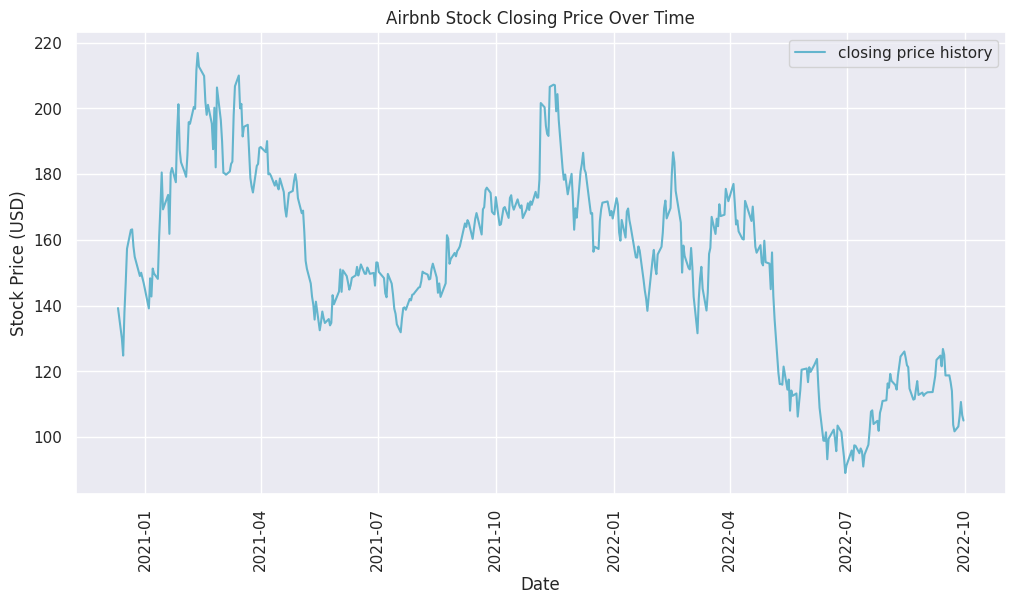

In [12]:
#2.Data Analysis
#Visualizing stock Prediction
plt.figure(figsize=(12,6))
plt.plot(df.index,df['Close'], label='closing price history',color='c')
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title("Airbnb Stock Closing Price Over Time")
plt.legend()
plt.xticks(rotation=90)
plt.show()


In [13]:
#Feature Engineering:Extracting Date Features
def create_features_datetime(df):
  df['year']=df.index.year
  df['month']=df.index.month
  df['day']=df.index.day
  df['dayofweek']=df.index.dayofweek
  return df

df=create_features_datetime(df)
df.head()

,Open,High,Low,Close,Adj Close,Volume,year,month,day,dayofweek
Date,,,,,,,,,,
2020-12-11,146.550003,151.500000,135.100006,139.250000,139.250000,26980800,2020,12,11,4
2020-12-14,135.000000,135.300003,125.160004,130.000000,130.000000,16966100,2020,12,14,0
2020-12-15,126.690002,127.599998,121.500000,124.800003,124.800003,10914400,2020,12,15,1
2020-12-16,125.830002,142.000000,124.910004,137.990005,137.990005,20409600,2020,12,16,2
2020-12-17,143.000000,152.449997,142.669998,147.050003,147.050003,15054700,2020,12,17,3


In [14]:
#3.Machine Learning Model for Stock Price Prediction
#splitting data into train and test set
x=df.drop(columns=['Close'])
y=df['Close']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [15]:
#Model:1  Descision Treee Regressor
dtree=DecisionTreeRegressor(random_state=0)
dtree.fit(x_train,y_train)

y_pred_dt=dtree.predict(x_test)

mae_dt=metrics.mean_absolute_error(y_test,y_pred_dt)
mse_dt=metrics.mean_squared_error(y_test,y_pred_dt)
r2_dt=metrics.r2_score(y_test,y_pred_dt)
rmse_dt=math.sqrt(mse_dt)

print(f'Decision Tree - MAE:{mae_dt},MSE:{mse_dt},R2:{r2_dt},RMSE:{rmse_dt}')


Decision Tree - MAE:0.4745046483516498,MSE:0.5647620297066723,R2:0.9993260338542183,RMSE:0.7515065067626975


In [16]:
#Model:2 Random Forest Regressor
rf=RandomForestRegressor(random_state=0)
rf.fit(x_train,y_train)

y_pred_dt=rf.predict(x_test)

mae_rf=metrics.mean_absolute_error(y_test,y_pred_dt)
mse_rf=metrics.mean_squared_error(y_test,y_pred_dt)
r2_f2=metrics.r2_score(y_test,y_pred_dt)
rmse_rf=math.sqrt(mse_rf)

print(f"Random Forest - MAE:{mae_rf},MSE:{mse_rf},R2:{r2_f2},RMSE:{rmse_rf}")


Random Forest - MAE:0.29341190791208555,MSE:0.22133349617428955,R2:0.9997358687810042,RMSE:0.47046094011542505


In [17]:
#4.Visualizing Predictions


In [18]:
#Adding Predictions to the Dataset
df['Predicted Close']=rf.predict(x)

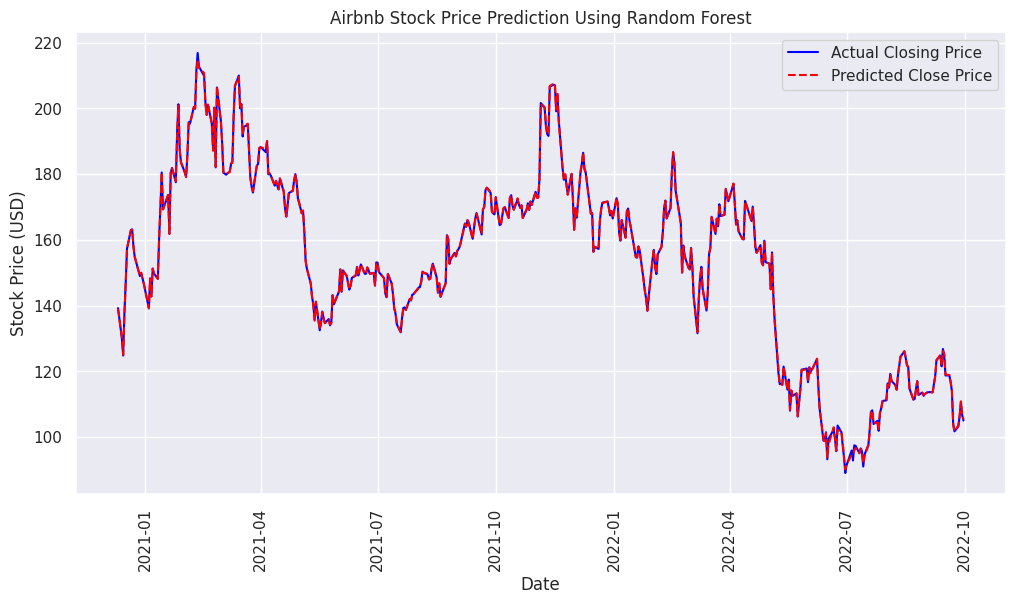

In [26]:
#Plot Actual VS Predicted Stock Prices
plt.figure(figsize=(12,6))
plt.plot(df.index,df['Close'],label='Actual Closing Price',color='blue')
plt.plot(df.index,df['Predicted Close'],label='Predicted Close Price',color='red',linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title("Airbnb Stock Price Prediction Using Random Forest")
plt.legend()
plt.xticks(rotation=90)
plt.show()


